# Machine Learning - Decision Trees and Random Forests

In [1]:
#Import modules
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## The Data

In [2]:
#Read in the csv file into the pandas dataframe
#data = pd.read_csv('Storm_test.csv')
data = pd.read_csv('Storm_Mode_Data_v1.csv')
data

,Index_number,Object_ID,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,...,eccentricity_stan,mean_intensity_stan,max_intensity_stan,intensity_variance_stan,major_axis_length_stan,minor_axis_length_stan,solidity_stan,convection_area_stan,intense_area_stan,Major_Minor_Ratio
0,0,mrms20200603r30,466,675,0.978882,32.110515,50.0,61.988323,58.994555,12.060162,...,1.147577,-0.510903,-1.471310,-0.848285,-0.228802,-0.595808,-0.098483,-0.345696,-0.424285,4.891688
1,1,mrms20200603r34,405,572,0.961438,34.646914,50.5,62.229651,45.848487,12.609321,...,1.018744,0.415740,-1.348620,-0.837847,-0.386088,-0.582442,0.054465,-0.354019,-0.418892,3.636079
2,3,mrms20200603r49,220,267,0.896060,37.415909,52.0,71.003156,26.010414,11.546880,...,0.535880,1.427360,-0.980551,-0.458383,-0.623441,-0.608301,1.057825,-0.379260,-0.437227,2.252592
3,5,mrms20200603r75,92,110,0.711249,32.907609,55.5,78.885486,13.281033,9.335774,...,-0.829084,-0.219694,-0.121724,-0.117463,-0.775742,-0.662117,1.165091,-0.396725,-0.515960,1.422596
4,12,mrms20200603r148,132,203,0.923318,32.340909,50.0,80.516357,24.529838,9.420374,...,0.737197,-0.426731,-1.471310,-0.046926,-0.641156,-0.660058,-0.445757,-0.391267,-0.500861,2.603913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,468,mrms20200620r4343,51,59,0.782835,38.078431,54.0,112.925221,10.425923,6.487312,...,-0.300366,1.669404,-0.489793,1.354796,-0.809902,-0.731447,1.407805,-0.402319,-0.515960,1.607125
250,469,mrms20200620r4346,105,118,0.845336,34.200000,51.0,72.117143,16.150098,8.627947,...,0.161247,0.252465,-1.225931,-0.410202,-0.741415,-0.679345,1.627848,-0.394951,-0.505175,1.871835
251,470,mrms20200620r4348,296,359,0.660030,37.327703,53.0,77.478760,23.035185,17.304930,...,-1.207369,1.395134,-0.735172,-0.178305,-0.659038,-0.468155,1.062520,-0.368891,-0.398400,1.331134
252,471,mrms20200620r4350,4069,6881,0.851506,30.084050,59.0,65.432110,118.948211,62.369874,...,0.206817,-1.251248,0.737104,-0.699337,0.488515,0.628690,-0.955605,0.145900,0.140868,1.907142


## Each Mode

In [3]:
#Isolated cell
iso_data= data[(data['Label'] == 'Isolated Cell')]
iso_data

,Index_number,Object_ID,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,...,eccentricity_stan,mean_intensity_stan,max_intensity_stan,intensity_variance_stan,major_axis_length_stan,minor_axis_length_stan,solidity_stan,convection_area_stan,intense_area_stan,Major_Minor_Ratio
3,5,mrms20200603r75,92,110,0.711249,32.907609,55.5,78.885486,13.281033,9.335774,...,-0.829084,-0.219694,-0.121724,-0.117463,-0.775742,-0.662117,1.165091,-0.396725,-0.515960,1.422596
4,12,mrms20200603r148,132,203,0.923318,32.340909,50.0,80.516357,24.529838,9.420374,...,0.737197,-0.426731,-1.471310,-0.046926,-0.641156,-0.660058,-0.445757,-0.391267,-0.500861,2.603913
6,14,mrms20200603r163,353,507,0.702766,31.005666,53.0,65.171356,28.746322,20.450739,...,-0.891735,-0.914547,-0.735172,-0.710615,-0.590707,-0.391588,-0.047573,-0.361114,-0.473898,1.405637
7,15,mrms20200603r164,69,78,0.821952,38.782609,51.0,82.061437,12.593171,7.172533,...,-0.011463,1.926667,-1.225931,0.019901,-0.783972,-0.714769,1.582711,-0.399863,-0.499782,1.755750
9,17,mrms20200603r177,525,607,0.809917,29.310476,50.0,56.316938,34.366815,20.157677,...,-0.100350,-1.533864,-1.471310,-1.093579,-0.523461,-0.398721,1.412155,-0.337646,-0.474976,1.704900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,462,mrms20200620r4328,147,173,0.709497,35.639456,59.5,124.216947,16.809252,11.845623,...,-0.842023,0.778353,0.859794,1.843177,-0.733529,-0.601030,1.280613,-0.389221,-0.483604,1.419026
249,468,mrms20200620r4343,51,59,0.782835,38.078431,54.0,112.925221,10.425923,6.487312,...,-0.300366,1.669404,-0.489793,1.354796,-0.809902,-0.731447,1.407805,-0.402319,-0.515960,1.607125
250,469,mrms20200620r4346,105,118,0.845336,34.200000,51.0,72.117143,16.150098,8.627947,...,0.161247,0.252465,-1.225931,-0.410202,-0.741415,-0.679345,1.627848,-0.394951,-0.505175,1.871835
251,470,mrms20200620r4348,296,359,0.660030,37.327703,53.0,77.478760,23.035185,17.304930,...,-1.207369,1.395134,-0.735172,-0.178305,-0.659038,-0.468155,1.062520,-0.368891,-0.398400,1.331134


In [4]:
#Cluster of Cells
clu_data= data[(data['Label'] == 'Cluster of Cells')]
clu_data

,Index_number,Object_ID,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,...,eccentricity_stan,mean_intensity_stan,max_intensity_stan,intensity_variance_stan,major_axis_length_stan,minor_axis_length_stan,solidity_stan,convection_area_stan,intense_area_stan,Major_Minor_Ratio
0,0,mrms20200603r30,466,675,0.978882,32.110515,50.0,61.988323,58.994555,12.060162,...,1.147577,-0.510903,-1.471310,-0.848285,-0.228802,-0.595808,-0.098483,-0.345696,-0.424285,4.891688
1,1,mrms20200603r34,405,572,0.961438,34.646914,50.5,62.229651,45.848487,12.609321,...,1.018744,0.415740,-1.348620,-0.837847,-0.386088,-0.582442,0.054465,-0.354019,-0.418892,3.636079
5,13,mrms20200603r160,1468,2454,0.846980,31.591621,54.0,83.068751,71.223603,37.864198,...,0.173391,-0.700475,-0.489793,0.063468,-0.082487,0.032242,-0.896158,-0.208982,-0.150337,1.881028
8,16,mrms20200603r165,460,611,0.959125,35.578261,51.5,84.814527,48.604683,13.754297,...,1.001660,0.755997,-1.103241,0.138975,-0.353112,-0.554574,0.442402,-0.346515,-0.335845,3.533782
10,20,mrms20200603r234,757,1230,0.804846,31.895641,55.0,73.352385,47.945963,28.455175,...,-0.137804,-0.589405,-0.244413,-0.356776,-0.360993,-0.196766,-0.746944,-0.305992,-0.362808,1.684965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,463,mrms20200620r4332,513,719,0.738885,32.627680,51.5,68.204458,34.337073,23.137410,...,-0.624972,-0.321963,-1.103241,-0.579430,-0.523817,-0.326197,0.101626,-0.339283,-0.419971,1.484050
246,464,mrms20200620r4334,948,1363,0.791625,30.962553,54.5,77.124389,49.318315,30.133865,...,-0.235450,-0.930298,-0.367103,-0.193632,-0.344573,-0.155909,-0.053873,-0.279932,-0.323981,1.636641
247,466,mrms20200620r4339,165,216,0.725955,35.878788,53.0,55.536823,19.972357,13.735834,...,-0.720468,0.865791,-0.735172,-1.127320,-0.695684,-0.555023,0.537821,-0.386765,-0.483604,1.454033
248,467,mrms20200620r4341,12572,24849,0.407188,37.251472,65.0,108.951855,187.311998,171.080395,...,-3.074795,1.367284,2.209380,1.182944,1.306455,3.274617,-1.694766,1.306057,5.044970,1.094877


In [5]:
#Linear
lin_data= data[(data['Label'] == 'Linear')]
lin_data

,Index_number,Object_ID,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,...,eccentricity_stan,mean_intensity_stan,max_intensity_stan,intensity_variance_stan,major_axis_length_stan,minor_axis_length_stan,solidity_stan,convection_area_stan,intense_area_stan,Major_Minor_Ratio
22,37,mrms20200603r380,31314,58213,0.319974,29.980775,60.0,68.130179,257.831265,244.276160,...,-3.718933,-1.288978,0.982484,-0.582643,2.150184,5.056143,-1.417934,3.863232,5.003985,1.055491
100,174,mrms20200605r1512,4176,10923,0.934587,32.402059,53.0,65.602237,185.406408,65.955346,...,0.820432,-0.404391,-0.735172,-0.691979,1.283656,0.715958,-2.764728,0.160500,0.372753,2.811090
164,316,mrms20200610r3061,5073,7135,0.843906,30.395230,54.5,44.705414,120.439463,64.614686,...,0.150686,-1.137562,-0.367103,-1.595792,0.506357,0.683327,0.080085,0.282887,0.026543,1.863964
165,317,mrms20200610r3071,351,431,0.971573,33.424501,51.5,63.741451,44.929015,10.636476,...,1.093599,-0.030854,-1.103241,-0.772460,-0.397089,-0.630459,0.974867,-0.361387,-0.444777,4.224051
167,319,mrms20200610r3077,323,494,0.938616,33.845201,54.5,84.903282,38.449169,13.263549,...,0.850188,0.122844,-0.367103,0.142814,-0.474617,-0.566518,-0.414600,-0.365207,-0.435070,2.898860
177,332,mrms20200610r3139,25960,53226,0.912967,32.077908,57.5,62.159868,379.605512,154.891915,...,0.660749,-0.522816,0.369035,-0.840866,3.607155,2.880603,-1.852325,3.132727,4.641597,2.450777
211,404,mrms20200619r3820,12368,30623,0.986350,34.255943,61.0,108.093432,417.342598,68.720405,...,1.202737,0.272903,1.227863,1.145816,4.058661,0.783257,-2.578066,1.278223,3.524234,6.073052
230,442,mrms20200620r4184,936,1353,0.942975,37.988248,56.0,105.657447,70.136520,23.345918,...,0.882380,1.636457,0.000966,1.040457,-0.095493,-0.321122,-0.086144,-0.281569,-0.071604,3.004230


In [6]:
#Supercell
sup_data= data[(data['Label'] == 'Supercell')]
sup_data

,Index_number,Object_ID,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,...,eccentricity_stan,mean_intensity_stan,max_intensity_stan,intensity_variance_stan,major_axis_length_stan,minor_axis_length_stan,solidity_stan,convection_area_stan,intense_area_stan,Major_Minor_Ratio
2,3,mrms20200603r49,220,267,0.896060,37.415909,52.0,71.003156,26.010414,11.546880,...,0.535880,1.427360,-0.980551,-0.458383,-0.623441,-0.608301,1.057825,-0.379260,-0.437227,2.252592
17,32,mrms20200603r328,1159,1672,0.712016,32.739862,59.0,88.489921,52.821363,37.089244,...,-0.823421,-0.280979,0.737104,0.297941,-0.302661,0.013380,-0.074150,-0.251143,-0.256033,1.424169
27,59,mrms20200604r766,312,407,0.928373,36.048077,55.5,91.053778,34.821394,12.941389,...,0.774533,0.927638,-0.121724,0.408830,-0.518022,-0.574360,0.561154,-0.366708,-0.423206,2.690700
99,172,mrms20200605r1505,478,656,0.973050,34.133891,51.5,74.058433,57.777748,13.323273,...,1.104505,0.228313,-1.103241,-0.326239,-0.243360,-0.565065,0.232902,-0.344059,-0.384379,4.336603
149,281,mrms20200610r2879,608,719,0.906183,36.803454,55.5,90.812932,43.733389,18.494213,...,0.610647,1.203606,-0.121724,0.398414,-0.411394,-0.439208,1.245196,-0.326321,-0.256033,2.364707
163,314,mrms20200610r3047,281,358,0.806216,36.195730,54.0,102.187669,25.739003,15.227747,...,-0.127683,0.981581,-0.489793,0.890384,-0.626688,-0.518711,0.719813,-0.370938,-0.415657,1.690270
169,321,mrms20200610r3079,719,815,0.567637,36.468707,57.5,96.319257,34.142117,28.108474,...,-1.889757,1.081310,0.369035,0.636569,-0.526149,-0.205205,1.561880,-0.311176,-0.245248,1.214656


### Data Columns Information

In [7]:
data.columns

Index(['Index_number', 'Object_ID', 'area', 'convex_area', 'eccentricity',
       'mean_intensity', 'max_intensity', 'intensity_variance',
       'major_axis_length', 'minor_axis_length', 'solidity', 'convection_area',
       'intense_area', 'Label', 'Area_stan', 'convex_area_stan',
       'eccentricity_stan', 'mean_intensity_stan', 'max_intensity_stan',
       'intensity_variance_stan', 'major_axis_length_stan',
       'minor_axis_length_stan', 'solidity_stan', 'convection_area_stan',
       'intense_area_stan', 'Major_Minor_Ratio'],
      dtype='object')

The following columns are used as input to train the decision tree model:
- **Area** - The total surface extent of the object
- **Convex Area** - The area of the shape totaling encompassing the object
- **Eccentricity** - The deviation of a curve from a circular manner
- **Mean Intesity** - The average value of the intensity area
- **Max Intesity** - The maximum value of the intensity area
- **Intesity Variance** - The 
- **Major Axis Length** - The length of the large axis
- **Minor Axis Length** - The length of the small axis
- **Solidity** - The 
- **Convection Area** - The area of the convection within the object
- **Intense Area** - The area of the intense within the object

The generation of this information can be done by using this <a href="https://github.com/jcorner1/NIU_Masters/blob/main/Masters_Thesis/METplus/MODE_stuff/Storm_Identification_MRMS.ipynb">  notebook </a>. It is important to note that intensity and convection is not a pre-determined number and for these data was set below the normal values. 

In [8]:
#Create a copy of the data
clean_data = data.copy()

In [9]:
#Subset the important attributes used within the model
input_features = ['area', 'convex_area', 'eccentricity',
       'mean_intensity', 'max_intensity', 'intensity_variance',
       'major_axis_length', 'minor_axis_length', 'solidity', 'convection_area',
       'intense_area']
X = clean_data[input_features].copy()

In [10]:
#Subset the labels
y=clean_data[['Label']].copy()

## Data Splits
The data is split using a typical (i.e., how its always been done and always will be done until someone tells me otherwise, now don't ask for a citaiton; Haberlie et al. 2023, personal communication) 80/20 split. The random state is used from the literature standard (Thought, 1979). 

In [11]:
#Generate the training/testing data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Trees

## Create the Model

In [12]:
#Create the decision tree model
mode_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
mode_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.5, 0.9285714285714286, 'X[6] <= 40.167\ngini = 0.533\nsamples = 203\nvalue = [117, 74, 5, 7]'),
 Text(0.2, 0.7857142857142857, 'X[5] <= 68.388\ngini = 0.422\nsamples = 90\nvalue = [21, 65, 0, 4]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.278\nsamples = 12\nvalue = [10, 2, 0, 0]'),
 Text(0.3, 0.6428571428571429, 'X[1] <= 242.0\ngini = 0.325\nsamples = 78\nvalue = [11, 63, 0, 4]'),
 Text(0.2, 0.5, 'gini = 0.05\nsamples = 39\nvalue = [1, 38, 0, 0]'),
 Text(0.4, 0.5, 'X[5] <= 91.633\ngini = 0.513\nsamples = 39\nvalue = [10, 25, 0, 4]'),
 Text(0.3, 0.35714285714285715, 'X[5] <= 81.577\ngini = 0.575\nsamples = 23\nvalue = [10, 11, 0, 2]'),
 Text(0.2, 0.21428571428571427, 'X[2] <= 0.374\ngini = 0.461\nsamples = 16\nvalue = [4, 11, 0, 1]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.357\nsamples = 14\nvalue = [2, 11, 0, 1]'),
 Text(0.4, 0.21428571428571427, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 1]

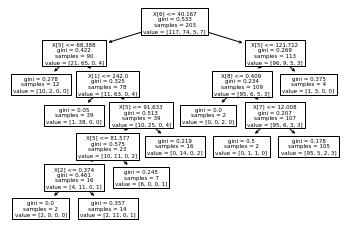

In [13]:
#Show the model's algorithm
plot_tree(mode_classifier)

## Test the Model

In [14]:
#Predict the mode of the testing dataset
predictions = mode_classifier.predict(X_test)

In [15]:
#Find the accuracy of the model
accuracy_score(y_true = y_test, y_pred = predictions)

0.7254901960784313

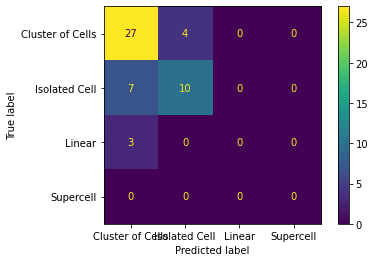

In [16]:
#Create a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=mode_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mode_classifier.classes_)
disp.plot()

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

## Create the Model

In [18]:
mode_forest  = RandomForestClassifier(n_estimators=10, bootstrap=True )
mode_forest.fit(X_train, y_train)

/tmp/ipykernel_15144/3519927893.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mode_forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

## Test the Model

In [19]:
#Predict the mode of the testing dataset
predictions = mode_forest.predict(X_test)

In [20]:
#Find the accuracy of the model
accuracy_score(y_true = y_test, y_pred = predictions)

0.803921568627451

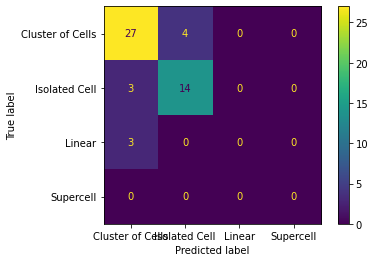

In [21]:
#Create a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=mode_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mode_forest.classes_)
disp.plot()